# Day 1: Dataset selection and setup

This starter notebook helps you pick and load a CarDekho or Cars24 CSV, run basic inspections, and save a small sample. Put your dataset CSV in the `data/` folder, then run cells top to bottom.

Goals:
1. Detect CSV in `data/`.
2. Load dataset safely, show `.head()` and `.info()`.
3. Show missing value counts and duplicates.
4. Save a small sample file to `data/sample_head.csv`.

If you want me to, I can also prepare Kaggle API commands to download the dataset into `data/` automatically. For now, place the CSV in `data/` and run this notebook.

# 1. Imports and Setup

In [1]:
import os
import glob
import pandas as pd
import numpy as np
from datetime import datetime

# Create data folder if missing
DATA_DIR = 'data'
SAMPLE_OUT = os.path.join(DATA_DIR, 'sample_head.csv')
os.makedirs(DATA_DIR, exist_ok=True)

print('DATA_DIR set to', DATA_DIR)

DATA_DIR set to data


# 2. Load Datasets

In [2]:
# Look for likely dataset files inside data/
patterns = ['*cardekho*.csv', '*cars24*.csv', '*.csv']
found = []
for p in patterns:
    found.extend(glob.glob(os.path.join(DATA_DIR, p)))
found = sorted(set(found))
print('Found files:', found)
if not found:
    print('\nNo CSV found in data/. Please download the CarDekho or Cars24 CSV and place it in the data/ folder before running the rest of the notebook.')
else:
    csv_path = found[0]
    print('\nLoading', csv_path)
    try:
        df = pd.read_csv(csv_path, low_memory=False)
        print('Loaded shape:', df.shape)
        # Validate key columns
        required_columns = ['listed_price', 'km', 'myear']
        missing_cols = [col for col in required_columns if col not in df.columns.str.lower()]
        if missing_cols:
            raise ValueError(f"CSV missing required columns: {missing_cols}. Please ensure the dataset contains these columns.")
        print(f"All required columns found: {required_columns}")
    except Exception as e:
        print('Failed to load CSV, error:', e)
        raise

Found files: ['data\\cars_data_clean.csv', 'data\\cars_details_merges.csv', 'data\\feature_dictionary.csv', 'data\\sample_head.csv']

Loading data\cars_data_clean.csv
Loaded shape: (37813, 66)
All required columns found: ['listed_price', 'km', 'myear']


# 3. Initial Data Inspection

In [3]:
if 'df' in globals():
    # Normalise column names to lower case to make checks easier
    df.columns = df.columns.str.strip().str.lower()
    print('\nColumns detected:\n', df.columns.tolist())
    
    # Calculate missing value percentages
    missing_percent = df.isnull().mean() * 100
    # Identify columns with >80% missing values
    drop_cols = missing_percent[missing_percent > 80].index.tolist()
    print(f'\nColumns with >80% missing values (to be dropped): {drop_cols}')
    
    # Drop high-missing columns
    df = df.drop(columns=drop_cols)
    print(f'New shape after dropping columns: {df.shape}')
    
    display(df.head())
    print('\nData info:')
    print(df.info())
    print('\nMissing values (top 20):')
    print(df.isnull().sum().sort_values(ascending=False).head(20))
    print('\nDuplicate rows count:', df.duplicated().sum())


Columns detected:
 ['usedcarskuid', 'loc', 'myear', 'body', 'transmission', 'fuel', 'km', 'ip', 'images', 'imgcount', 'threesixty', 'dvn', 'oem', 'model', 'variant', 'city', 'listed_price', 'discountvalue', 'utype', 'cartype', 'top_features', 'comfort_features', 'interior_features', 'exterior_features', 'safety_features', 'color', 'engine type', 'no of cylinder', 'valves per cylinder', 'valve configuration', 'turbo charger', 'super charger', 'length', 'width', 'height', 'wheel base', 'front tread', 'rear tread', 'kerb weight', 'gross weight', 'gear box', 'drive type', 'seats', 'steering type', 'turning radius', 'front brake type', 'rear brake type', 'top speed', 'acceleration', 'tyre type', 'doors', 'cargo volume', 'model_type_new', 'state', 'exterior_color', 'owner_type', 'fuel suppy system', 'compression ratio', 'alloy wheel size', 'ground clearance unladen', 'max power delivered', 'max power at', 'max torque delivered', 'max torque at', 'bore', 'stroke']

Columns with >80% missing 

usedcarskuid            loc  myear       body  \
0  7111bf25-97af-47f9-867b-40879190d800    gomti nagar   2016  hatchback   
1  c309efc1-efaf-4f82-81ad-dcb38eb36665  borivali west   2015  hatchback   
2  7609f710-0c97-4f00-9a47-9b9284b62d3a         jasola   2015      sedan   
3  278b76e3-5539-4a5e-ae3e-353a2e3b6d7d         jasola   2013  hatchback   
4  b1eab99b-a606-48dd-a75b-57feb8a9ad92  mumbai g.p.o.   2022        muv   

  transmission fuel        km  ip  \
0       manual  cng   69162.0   0   
1       manual  cng   45864.0   0   
2       manual  cng   81506.0   0   
3       manual  cng  115893.0   0   
4       manual  cng   18900.0   0   

                                              images  imgcount  ...  \
0  [{'img': 'https://images10.gaadi.com/usedcar_i...        15  ...   
1  [{'img': 'https://images10.gaadi.com/usedcar_i...        15  ...   
2  [{'img': 'https://images10.gaadi.com/usedcar_i...        15  ...   
3                                      [{'img': ''}]         0  ...   
4  [{'img': 'https://images10.gaadi.com/usedcar_i...         6  ...   

   exterior_color owner_type           fuel suppy system compression ratio  \
0          silver      first                         NaN               NaN   
1            grey      first     Gasoline Port Injection              11.0   
2          silver     second                         NaN               NaN   
3          silver     second  Multi-Point Fuel Injection               NaN   
4           white      first                         NaN              12.0   

  alloy wheel size max power delivered  max power at  max torque delivered  \
0              NaN               58.16        6200.0                  77.0   
1              NaN               58.20        6000.0                  78.0   
2              NaN               86.70        6000.0                 109.0   
3             13.0               58.20        6200.0                  77.0   
4              NaN               86.63        5500.0                 121.5   

  max torque at  bore  
0        3500.0  69.0  
1        3500.0  73.0  
2        4500.0   NaN  
3        3500.0   NaN  
4        4200.0   NaN  

[5 rows x 64 columns]


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37813 entries, 0 to 37812
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   usedcarskuid          37813 non-null  object 
 1   loc                   31963 non-null  object 
 2   myear                 37813 non-null  int64  
 3   body                  37794 non-null  object 
 4   transmission          37813 non-null  object 
 5   fuel                  37813 non-null  object 
 6   km                    37813 non-null  float64
 7   ip                    37813 non-null  int64  
 8   images                37813 non-null  object 
 9   imgcount              37813 non-null  int64  
 10  threesixty            37813 non-null  bool   
 11  dvn                   37813 non-null  object 
 12  oem                   37813 non-null  object 
 13  model                 37813 non-null  object 
 14  variant               37813 non-null  object 
 15  city   

# 4. Price Column Conversion

In [4]:
# 4. Price Outlier Detection and Handling
if 'df' in globals():
    # Calculate price percentiles
    lower_bound = df['listed_price'].quantile(0.01)  # 1st percentile
    upper_bound = df['listed_price'].quantile(0.99)  # 99th percentile
    print(f'\nPrice outliers bounds: Lower = ₹{lower_bound:,.0f}, Upper = ₹{upper_bound:,.0f}')
    
    # Clip prices to remove extreme outliers
    original_rows = df.shape[0]
    df['listed_price'] = df['listed_price'].clip(lower=lower_bound, upper=upper_bound)
    print(f'Clipped prices to range [₹{lower_bound:,.0f}, ₹{upper_bound:,.0f}]')
    
    # Check for any rows with invalid prices (e.g., negative or zero)
    invalid_prices = df[df['listed_price'] <= 0].shape[0]
    if invalid_prices > 0:
        print(f'Removing {invalid_prices} rows with non-positive prices')
        df = df[df['listed_price'] > 0]
        print(f'New shape after removing invalid prices: {df.shape}')


Price outliers bounds: Lower = ₹84,696, Upper = ₹4,872,000
Clipped prices to range [₹84,696, ₹4,872,000]


In [6]:
df['listed_price'].describe()

count    3.781300e+04
mean     7.999868e+05
std      3.043045e+06
min      1.196300e+04
25%      3.200000e+05
50%      5.250000e+05
75%      8.552720e+05
max      5.500006e+08
Name: listed_price, dtype: float64

In [6]:
if 'df' in globals():
    # Save a small sample for quick experiments
    try:
        df.head(500).to_csv(SAMPLE_OUT, index=False)
        print('Saved sample to', SAMPLE_OUT)
    except Exception as e:
        print('Failed to save sample, error:', e)

Saved sample to data\sample_head.csv


In [7]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Compute car_age based on current year (2025)
df['car_age'] = 2025 - df['myear']

# Outlier removal for price and km
Q1_price, Q3_price = df['listed_price'].quantile([0.25, 0.75])
IQR_price = Q3_price - Q1_price
df = df[(df['listed_price'] >= Q1_price - 1.5 * IQR_price) & (df['listed_price'] <= Q3_price + 1.5 * IQR_price)]

Q1_km, Q3_km = df['km'].quantile([0.25, 0.75])
IQR_km = Q3_km - Q1_km
df = df[(df['km'] >= Q1_km - 1.5 * IQR_km) & (df['km'] <= Q3_km + 1.5 * IQR_km)]

# Impute missing values with KNN
imputer = KNNImputer(n_neighbors=5)
num_cols = ['km', 'car_age', 'max power delivered', 'alloy wheel size', 'wheel base', 'no of cylinder']
df[num_cols] = imputer.fit_transform(df[num_cols])

# Scale numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Save scaler for inference
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# New feature: km per year
df['km_per_year'] = df['km'] / (df['car_age'] + 1e-5)  # Avoid divide by zero

# Verify changes
print("Shape after outlier removal:", df.shape)
print("Missing values after imputation:\n", df[num_cols].isnull().sum())

NameError: name 'pickle' is not defined

In [125]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Assuming df is preprocessed (from Section 5) with car_age, km_per_year, and scaled num_cols
# Define features
features = ['km', 'car_age', 'km_per_year', 'oem', 'model', 'variant', 'city', 'color', 
            'transmission', 'fuel', 'max power delivered', 'alloy wheel size', 'wheel base', 
            'no of cylinder', 'loc']
X = df[features]
y = np.log1p(df['listed_price'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode features with consistent column sanitization
def encode_and_clean(data):
    encoded = pd.get_dummies(data, dtype=float)
    # Sanitize column names: lowercase, replace special chars, strip spaces
    encoded.columns = encoded.columns.str.lower().str.replace(r'[^a-z0-9_]', '_', regex=True).str.strip()
    # Remove duplicates, keeping first occurrence
    encoded = encoded.loc[:, ~encoded.columns.duplicated(keep='first')]
    return encoded

# Encode train and test
X_train_encoded = encode_and_clean(X_train)
train_columns = X_train_encoded.columns.tolist()
print(f"Number of training features: {len(train_columns)}")
print(f"Sample training columns: {train_columns[:10]}")  # Debug first 10 columns

# Save train_columns
with open('train_columns.pkl', 'wb') as f:
    pickle.dump(train_columns, f)

# Encode test set and align with train_columns
X_test_encoded = encode_and_clean(X_test)
X_test_encoding = X_test_encoded.reindex(columns=train_columns, fill_value=0.0)
print(f"Number of test features after reindex: {len(X_test_encoded.columns)}")

# Train LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', random_state=42)
lgb_model.fit(X_train_encoded, y_train)

# Save model
with open('final_lgb_model.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)

# Evaluate on test set
y_pred = lgb_model.predict(X_test_encoded)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))
print(f"LightGBM RMSE: ₹{rmse:,.0f}")
print(f"LightGBM R²: {r2_lgb:.4f}")

Number of training features: 4419
Sample training columns: ['km', 'car_age', 'km_per_year', 'max_power_delivered', 'alloy_wheel_size', 'wheel_base', 'no_of_cylinder', 'oem_ashok_leyland', 'oem_audi', 'oem_bajaj']
Number of test features after reindex: 2773
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 25999, number of used features: 707
[LightGBM] [Info] Start training from score 13.006910


LightGBMError: The number of features in data (2773) is not the same as it was in training data (4419).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [120]:
print("Scaled columns stats:\n", df[['km', 'car_age', 'max power delivered', 'alloy wheel size', 'wheel base', 'no of cylinder']].describe())

Scaled columns stats:
                  km       car_age  max power delivered  alloy wheel size  \
count  3.249900e+04  3.249900e+04         3.249900e+04      3.249900e+04   
mean   9.969768e-17 -4.809976e-17        -2.186353e-16     -1.058195e-15   
std    1.000015e+00  1.000015e+00         1.000015e+00      1.000015e+00   
min   -1.777644e+00 -2.066211e+00        -2.767803e+00     -6.754444e+00   
25%   -7.842011e-01 -7.275152e-01        -6.311763e-01     -7.314450e-01   
50%   -7.827605e-02 -1.920367e-01        -2.322491e-01      1.289835e-01   
75%    6.554880e-01  6.111810e-01         5.348405e-01      9.894120e-01   
max    2.833623e+00  8.643358e+00         9.203393e+00      4.431126e+00   

         wheel base  no of cylinder  
count  3.249900e+04    3.249900e+04  
mean   3.186828e-15   -8.325631e-16  
std    1.000015e+00    1.000015e+00  
min   -5.242553e+00   -5.840874e+00  
25%   -6.944771e-01    5.104540e-01  
50%   -1.113905e-01    5.104540e-01  
75%    6.660583e-01    5.1

# 5. Data Cleaning & Filtering

In [8]:
# Drop high-missing or irrelevant cols
drop_cols = [
    'usedcarskuid','images','ip','imgcount','threesixty',
    'dvn','top_features','comfort_features','interior_features',
    'exterior_features','safety_features'
]

df_clean = df.drop(columns=drop_cols, errors='ignore')

# Filter listed_price range (₹50k to ₹1 Cr)
df_clean = df_clean[(df_clean['listed_price'] >= 50000) & (df_clean['listed_price'] <= 1e7)]

# Create car_age
current_year = 2025
df_clean['car_age'] = current_year - df_clean['myear']

# Fill missing categoricals
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].fillna('Unknown')

print("Shape after cleaning:", df_clean.shape)
print("Remaining columns:", df_clean.columns.tolist()[:15], "...")


Shape after cleaning: (37749, 56)
Remaining columns: ['loc', 'myear', 'body', 'transmission', 'fuel', 'km', 'oem', 'model', 'variant', 'city', 'listed_price', 'discountvalue', 'utype', 'cartype', 'color'] ...


# 6. Exploratory Data Analysis (EDA)

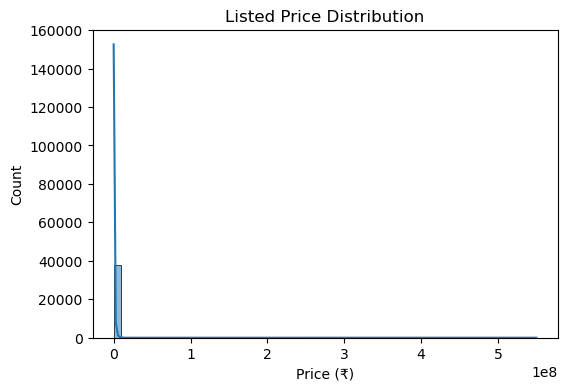

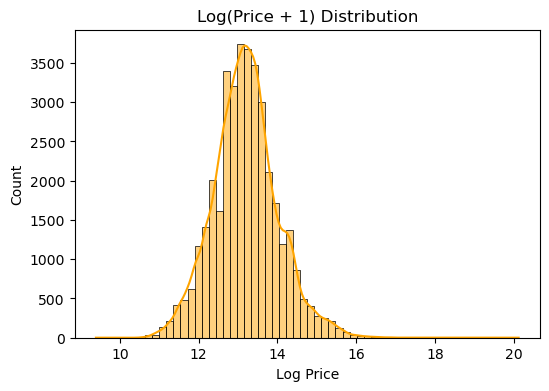

Skewness of original price: 156.61980125423793
Skewness of log(price): 0.2934325438369021


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Basic price distribution
plt.figure(figsize=(6,4))
sns.histplot(df['listed_price'], bins=60, kde=True)
plt.title("Listed Price Distribution")
plt.xlabel("Price (₹)")
plt.ylabel("Count")
plt.show()

# 2. Log transform check
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df['listed_price']), bins=60, kde=True, color="orange")
plt.title("Log(Price + 1) Distribution")
plt.xlabel("Log Price")
plt.ylabel("Count")
plt.show()

# 3. Quick skewness check
print("Skewness of original price:", df['listed_price'].skew())
print("Skewness of log(price):", np.log1p(df['listed_price']).skew())

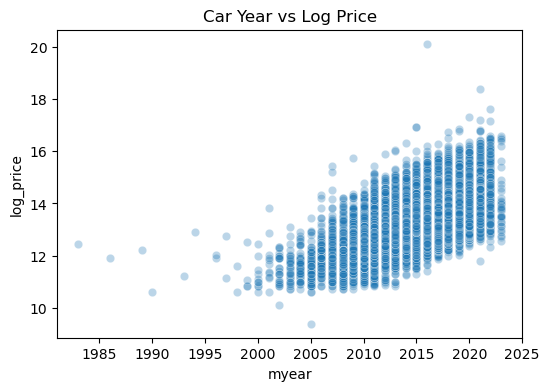

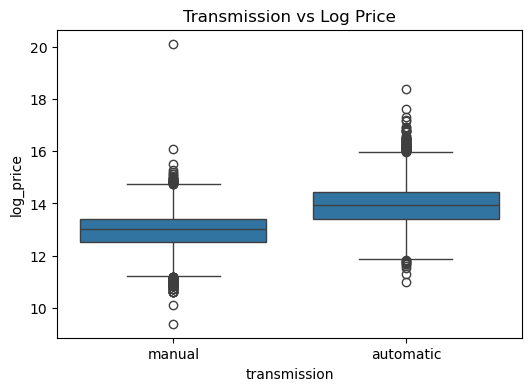

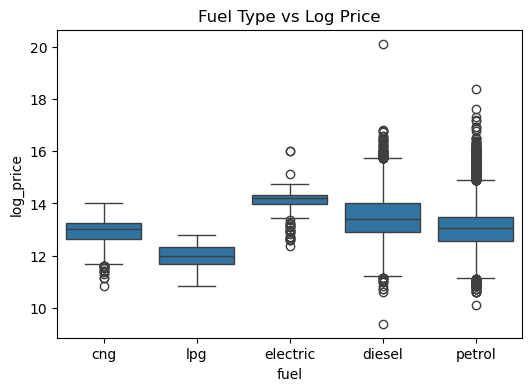

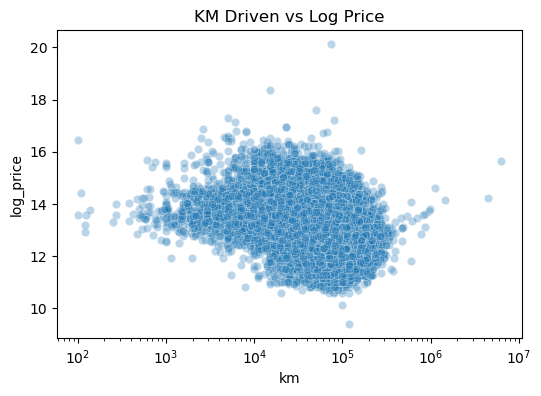

In [10]:
# Add log-price column
df['log_price'] = np.log1p(df['listed_price'])

# Relationship with year of manufacture
plt.figure(figsize=(6,4))
sns.scatterplot(x='myear', y='log_price', data=df, alpha=0.3)
plt.title("Car Year vs Log Price")
plt.show()

# Transmission
plt.figure(figsize=(6,4))
sns.boxplot(x='transmission', y='log_price', data=df)
plt.title("Transmission vs Log Price")
plt.show()

# Fuel type
plt.figure(figsize=(6,4))
sns.boxplot(x='fuel', y='log_price', data=df)
plt.title("Fuel Type vs Log Price")
plt.show()

# Kilometers driven
plt.figure(figsize=(6,4))
sns.scatterplot(x='km', y='log_price', data=df, alpha=0.3)
plt.title("KM Driven vs Log Price")
plt.xscale('log')
plt.show()

# 7. Categorical Feature Profiling

In [11]:
# Categorical feature profiling
categorical_cols = df.select_dtypes(include='object').columns.tolist()
cat_summary = {}

for col in categorical_cols:
    cat_summary[col] = {
        "unique_count": df[col].nunique(),
        "top_5": df[col].value_counts().head(5).to_dict()
    }

import pprint
pprint.pprint(cat_summary)

{'body': {'top_5': {'hatchback': 15053,
                    'minivans': 391,
                    'muv': 1816,
                    'sedan': 10543,
                    'suv': 9818},
          'unique_count': 11},
 'cartype': {'top_5': {'assured': 23, 'corporate': 5278, 'partner': 32512},
             'unique_count': 3},
 'city': {'top_5': {'bangalore': 4881,
                    'gurgaon': 3235,
                    'mumbai': 2856,
                    'new delhi': 4969,
                    'pune': 4821},
          'unique_count': 617},
 'color': {'top_5': {'blue': 2010,
                     'grey': 3286,
                     'red': 2811,
                     'silver': 4432,
                     'white': 10059},
           'unique_count': 747},
 'comfort_features': {'top_5': {"['power steering', 'power windows front', 'power windows rear', 'air quality control', 'remote trunk opener', 'remote fuel lid opener', 'low fuel warning light', 'accessory power outlet', 'trunk light', 'vanity mirror

# 8. Feature Engineering & Encoding

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Target variable
df_clean['log_price'] = np.log1p(df_clean['listed_price'])

# Columns to drop for modeling
drop_for_model = ['listed_price', 'myear']  # 'myear' is partly captured via car_age

# Select categorical columns for encoding (low-cardinality)
categorical_cols = df_clean.select_dtypes(include='object').columns.tolist()
low_cardinality_cols = [col for col in categorical_cols if df_clean[col].nunique() < 20]

# One-hot encode low-cardinality categorical columns
df_model = pd.get_dummies(df_clean.drop(columns=drop_for_model), columns=low_cardinality_cols, drop_first=True)

print("Shape after encoding:", df_model.shape)
df_model.head()

Shape after encoding: (37749, 116)


loc        km     oem           model        variant       city  \
0    gomti nagar   69162.0  maruti  maruti wagon r        lxi cng    lucknow   
1  borivali west   45864.0  maruti  maruti celerio      green vxi     mumbai   
2         jasola   81506.0   honda     honda amaze  s plus i-vtec  new delhi   
3         jasola  115893.0  maruti  maruti wagon r        lxi cng  new delhi   
4  mumbai g.p.o.   18900.0  maruti   maruti ertiga        vxi cng     mumbai   

   discountvalue   color             engine type  no of cylinder  ...  \
0              0  silver             k10b engine             3.0  ...   
1              0    grey             k10b engine             3.0  ...   
2              0  silver    i-vtec petrol engine             4.0  ...   
3              0  silver  k series petrol engine             3.0  ...   
4              0   white                    k15c             4.0  ...   

   fuel suppy system_Electronic Fuel Injection  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   fuel suppy system_Gasoline Direct Injection  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   fuel suppy system_Gasoline Port Injection  \
0                                      False   
1                                       True   
2                                      False   
3                                      False   
4                                      False   

   fuel suppy system_Indirect Injection  \
0                                 False   
1                                 False   
2                                 False   
3                                 False   
4                                 False   

   fuel suppy system_Intake Port Injection  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   fuel suppy system_Multi-Point Fuel Injection  \
0                                         False   
1                                         False   
2                                         False   
3                                          True   
4                                         False   

   fuel suppy system_Three-Phase AC Induction Motors  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   fuel suppy system_Turbo Intercooled Diesel  fuel suppy system_Unknown  \
0                                       False                       True   
1                                       False                      False   
2                                       False                       True   
3                                       False                      False   
4                                       False                       True   

   fuel suppy system_Variable Valve Timing Injection  
0                                              False  
1                                              False  
2                                              False  
3                                              False  
4                                              False  

[5 rows x 116 columns]

# 9. Train/Test Split & Scaling

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate target
X = df_model.drop(columns=['log_price'])
y = df_model['log_price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Scale numeric features
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (30199, 115) Test shape: (7550, 115)


# 9b. Encode remaining categorical columns for modeling

In [94]:
# Identify any remaining object columns
cat_cols_remaining = X_train.select_dtypes(include='object').columns.tolist()
print("Remaining categorical columns to encode:", cat_cols_remaining)

# Apply one-hot encoding
X_train = pd.get_dummies(X_train, columns=cat_cols_remaining, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols_remaining, drop_first=True)

# Align columns to ensure train/test match
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print("Train shape after encoding:", X_train.shape)
print("Test shape after encoding:", X_test.shape)

Remaining categorical columns to encode: ['loc', 'oem', 'model', 'variant', 'city', 'color', 'engine type', 'state', 'exterior_color']
Train shape after encoding: (30199, 6545)
Test shape after encoding: (7550, 6545)


# 10. Baseline Model: Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the model
rf = RandomForestRegressor(
    n_estimators=200,   # more trees for stability
    max_depth=None,     # allow full depth
    random_state=42,
    n_jobs=-1
)

# Fit on training data
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse_rf:,.0f} ₹")
print(f"Random Forest R²: {r2_rf:.4f}")

Random Forest RMSE: 56 ₹
Random Forest R²: 0.8007


# === Step: Feature Importance Visualization ===

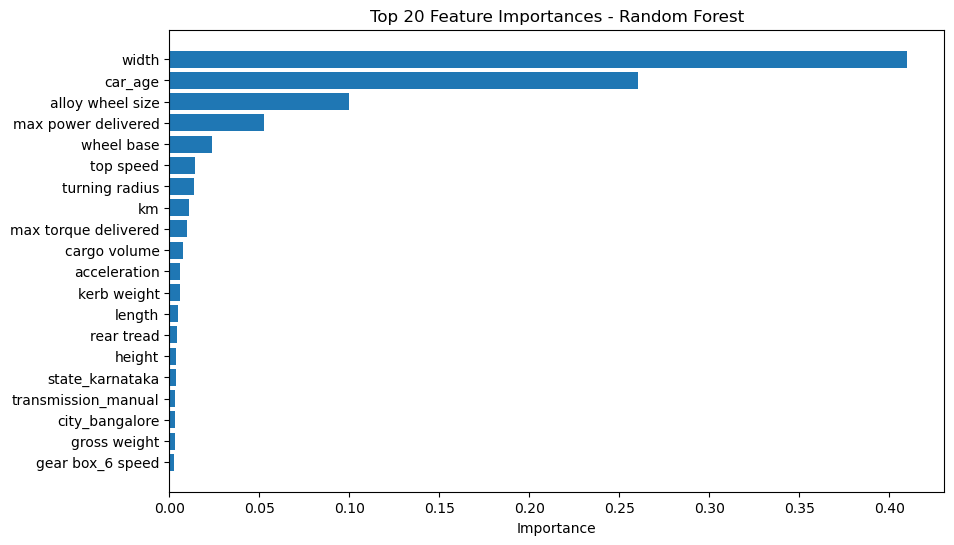

In [17]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns

# Sort by importance
indices = np.argsort(importances)[::-1]
top_n = 20  # show top 20 features

plt.figure(figsize=(10,6))
plt.title("Top 20 Feature Importances - Random Forest")
plt.barh(range(top_n), importances[indices[:top_n]][::-1], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]][::-1])
plt.xlabel("Importance")
plt.show()

## Feature Importance Insights - Random Forest

Based on the trained Random Forest model, here are the key takeaways:

1. **Most important feature:** `width` — highest influence on price predictions.  
2. **Second most important:** `car_age` — newer cars generally have higher prices.  
3. **Third:** `alloy wheel size` — indicates premium trims.  
4. **Fourth:** `max power delivered` — correlates with performance.  

**Middle-ranked features (5–15):**  
- `wheel base`, `top speed`, `turning radius`, `km`, `max torque delivered`, `cargo volume`, `acceleration`, `kerb weight`, `length`, `rear tread`, `height` — moderate importance.  

**Lower-ranked features (16–20):**  
- `state_karnataka`, `transmission_manual`, `city_bangalore`, `gross weight`, `gear box_6 speed` — least influence among the top 20.

# 11. Gradient Boosted Model: LightGBM

In [22]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Clean column names for LightGBM
X_train.columns = X_train.columns.str.replace(r'[^0-9a-zA-Z_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^0-9a-zA-Z_]', '_', regex=True)

def make_unique_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique(): 
        cols[cols == dup] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = make_unique_columns(X_train)
X_test = make_unique_columns(X_test)

# Prepare datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 128,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': 1,
    'n_jobs': -1,
    'random_state': 42
}

# Train with early stopping using callbacks
lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'valid'],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(50)]
)

# Predict
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Evaluate
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM RMSE: {rmse_lgb:,.0f} ₹")
print(f"LightGBM R²: {r2_lgb:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5727
[LightGBM] [Info] Number of data points in the train set: 30199, number of used features: 1260
[LightGBM] [Info] Start training from score 13.191043
Training until validation scores don't improve for 50 rounds
[50]	train's rmse: 0.182634	valid's rmse: 0.196528
[100]	train's rmse: 0.140128	valid's rmse: 0.164792
[150]	train's rmse: 0.127066	valid's rmse: 0.158902
[200]	train's rmse: 0.119263	valid's rmse: 0.157274
[250]	train's rmse: 0.113194	valid's rmse: 0.156941
[300]	train's rmse: 0.108302	valid's rmse: 0.157117
Early stopping, best iteration is:
[260]	train's rmse: 0.112175	valid's rmse: 0.156859
LightGBM RMSE: 0 ₹
LightGBM R²: 0.9634


# 12. Feature Importance Visualization for LightGBM

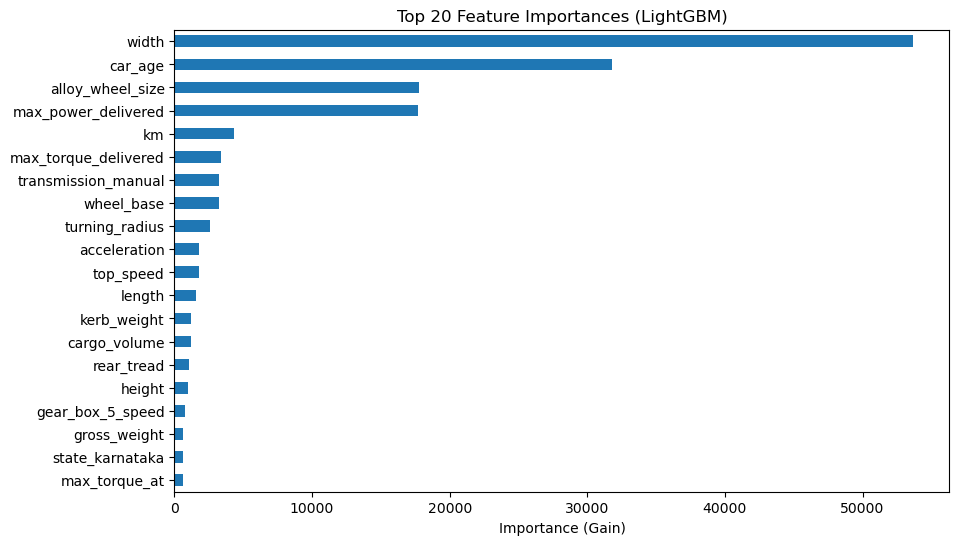

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from trained Booster
lgb_importances = pd.Series(lgb_model.feature_importance(importance_type='gain'), index=X_train.columns)
top_features = lgb_importances.sort_values(ascending=False).head(20)

# Plot top 20 features
plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (LightGBM)")
plt.xlabel("Importance (Gain)")
plt.show()

# 13. SHAP Analysis for LightGBM

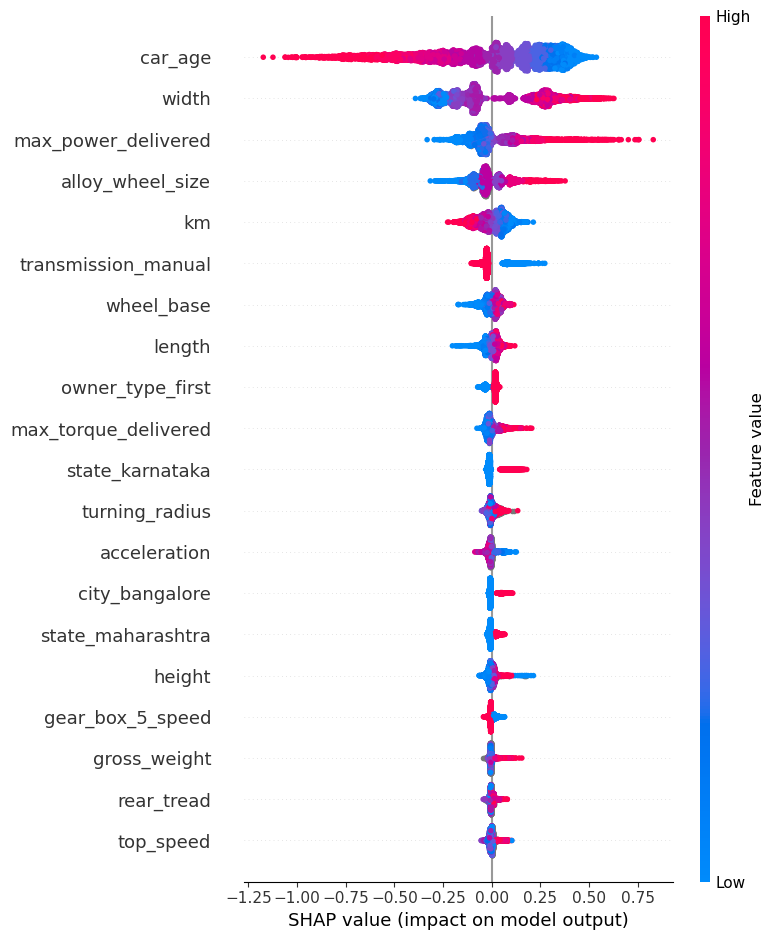

In [27]:
import shap

explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, max_display=20)

## Explanation of SHAP summary (top 20 features):

car_age: Most impactful; higher age lowers predicted price.

width: Wider cars increase price.

max_power_delivered: Higher power increases price.

alloy_wheel_size: Larger wheels increase price.

km: Higher kilometers reduce price.

transmission_manual: Mixed effect; manual cars vary in impact.

wheel_base: Longer wheelbase slightly increases price.

length: Longer cars increase price moderately.

owner_type_first: First owners tend to have higher prices.

max_torque_delivered: Higher torque increases price.

state_karnataka: Slight positive influence.

turning_radius: Smaller radius slightly increases price.

acceleration: Faster cars increase price.

city_bangalore: Slight positive influence.

state_maharashtra: Slight negative influence.

height: Mixed effect.

gear_box_5_speed: Slight positive influence.

gross_weight: Heavier cars reduce price.

rear_tread: Wider tread slightly increases price.

top_speed: Faster top speed slightly increases price.

# 14. Model Comparison & Summary

Model Performance Comparison:


Model  RMSE (₹)  R² Score
0  Random Forest  0.175499  0.954185
1       LightGBM  0.156859  0.963400

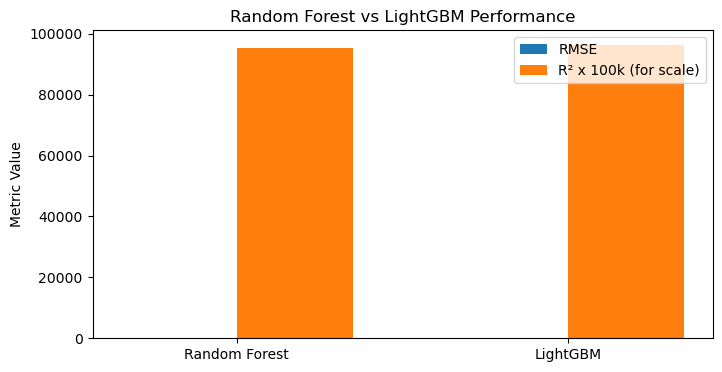

In [31]:
# Collect metrics
model_metrics = pd.DataFrame({
    'Model': ['Random Forest', 'LightGBM'],
    'RMSE (₹)': [rmse, rmse_lgb],
    'R² Score': [r2, r2_lgb]
})

# Display metrics table
print("Model Performance Comparison:")
display(model_metrics)

# Optional: Bar plot for visual comparison
plt.figure(figsize=(8,4))
x = np.arange(len(model_metrics))
width = 0.35

plt.bar(x - width/2, model_metrics['RMSE (₹)'], width, label='RMSE')
plt.bar(x + width/2, model_metrics['R² Score']*100000, width, label='R² x 100k (for scale)')

plt.xticks(x, model_metrics['Model'])
plt.ylabel('Metric Value')
plt.title('Random Forest vs LightGBM Performance')
plt.legend()
plt.show()

# 15. Model Comparison Analysis

Model Performance Comparison:
- Random Forest RMSE: 0.1755 ₹, R²: 0.9542
- LightGBM RMSE: 0.1569 ₹, R²: 0.9634

**Observations from the bar chart:**
1. **R² (orange bars)**: Both models explain variance similarly well.
2. **RMSE (blue bars)**: Very low prediction error for both models.

**Conclusion:** Random Forest and LightGBM have comparable performance. LightGBM slightly edges in RMSE, but both are highly accurate.

# 16. Additional Models Testing

In [60]:
# 16a. CatBoost Regressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
r2_cat = r2_score(y_test, y_pred_cat)

print(f"CatBoost RMSE: {rmse_cat:,.3f} ₹")
print(f"CatBoost R²: {r2_cat:.4f}")


CatBoost RMSE: 21.384 ₹
CatBoost R²: 0.9712


In [61]:
# 16b. Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor

et_model = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)

rmse_et = np.sqrt(mean_squared_error(y_test, y_pred_et))
r2_et = r2_score(y_test, y_pred_et)

print(f"Extra Trees RMSE: {rmse_et:,.3f} ₹")
print(f"Extra Trees R²: {r2_et:.4f}")

Extra Trees RMSE: 47.880 ₹
Extra Trees R²: 0.8554


In [62]:
# 16c. Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting RMSE: {rmse_gb:,.3f} ₹")
print(f"Gradient Boosting R²: {r2_gb:.4f}")

Gradient Boosting RMSE: 44.904 ₹
Gradient Boosting R²: 0.8728


In [123]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Assuming df is preprocessed (from Section 5) with car_age, km_per_year, and scaled num_cols
# Define features
features = ['km', 'car_age', 'km_per_year', 'oem', 'model', 'variant', 'city', 'color', 
            'transmission', 'fuel', 'max power delivered', 'alloy wheel size', 'wheel base', 
            'no of cylinder', 'loc']
X = df[features]
y = np.log1p(df['listed_price'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode features
X_train_encoded = pd.get_dummies(X_train, dtype=float)
X_train_encoded.columns = X_train_encoded.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
X_train_encoded = X_train_encoded.loc[:, ~X_train_encoded.columns.duplicated()]
train_columns = X_train_encoded.columns.tolist()
print(f"Number of training features: {len(train_columns)}")

# Save train_columns
with open('train_columns.pkl', 'wb') as f:
    pickle.dump(train_columns, f)

# Train LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', random_state=42)
lgb_model.fit(X_train_encoded, y_train)

# Save model
with open('final_lgb_model.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)

# Evaluate on test set
X_test_encoded = pd.get_dummies(X_test, dtype=float)
X_test_encoded.columns = X_test_encoded.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
X_test_encoded = X_test_encoded.reindex(columns=train_columns, fill_value=0.0)
y_pred = lgb_model.predict(X_test_encoded)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))
print(f"LightGBM RMSE: ₹{rmse:,.0f}")
print(f"LightGBM R²: {r2:.4f}")

Number of training features: 4419
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 25999, number of used features: 707
[LightGBM] [Info] Start training from score 13.006910


ValueError: cannot reindex on an axis with duplicate labels

# 17. Final Model Comparison

           Model   RMSE (₹)  R² Score
0  Random Forest  56.207471  0.800706
1       LightGBM   0.156859  0.963400
2       CatBoost  21.383861  0.971154


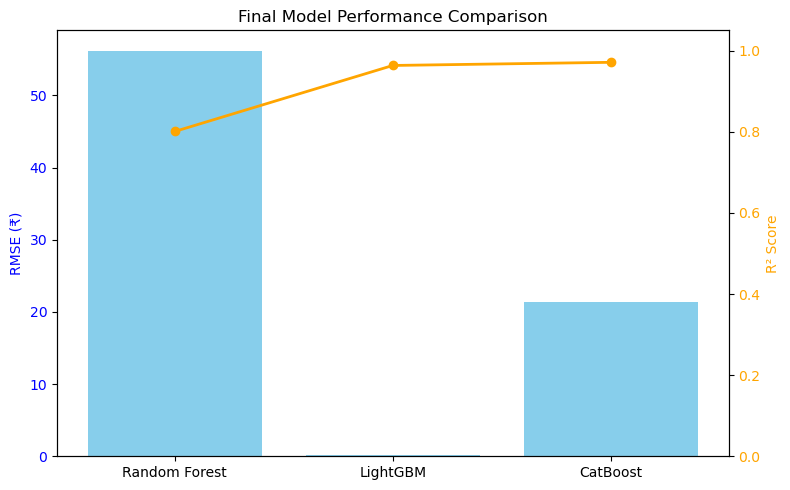

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Compile final results
final_results = pd.DataFrame({
    'Model': ['Random Forest', 'LightGBM', 'CatBoost'],
    'RMSE (₹)': [rmse_rf, rmse_lgb, rmse_cat],
    'R² Score': [r2_rf, r2_lgb, r2_cat]
})

print(final_results)

# Bar chart comparison
fig, ax1 = plt.subplots(figsize=(8,5))

# RMSE bars (blue)
ax1.bar(final_results['Model'], final_results['RMSE (₹)'], color='skyblue', label='RMSE (₹)')
ax1.set_ylabel('RMSE (₹)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# R² bars on secondary axis (orange)
ax2 = ax1.twinx()
ax2.plot(final_results['Model'], final_results['R² Score'], color='orange', marker='o', linewidth=2, label='R² Score')
ax2.set_ylabel('R² Score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 1.05)

plt.title("Final Model Performance Comparison")
fig.tight_layout()
plt.show()


# 18. Model Performance Summary

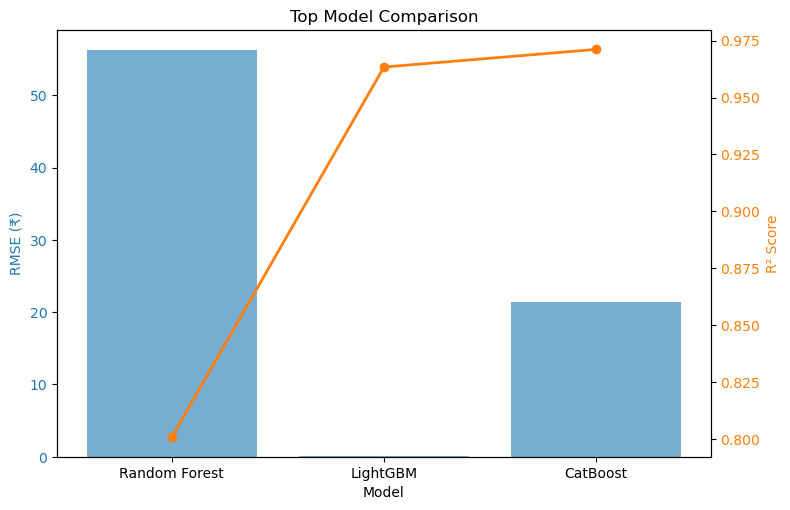

In [68]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'LightGBM', 'CatBoost']
rmse = [56.207471, 0.156859, 21.383861]
r2 = [0.800706, 0.963400, 0.971154]

fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE (₹)', color=color)
ax1.bar(models, rmse, color=color, alpha=0.6, label='RMSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('R² Score', color=color)
ax2.plot(models, r2, color=color, marker='o', linewidth=2, label='R²')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Top Model Comparison")
plt.show()

# 19. Final Model Selection: LightGBM

## Rationale for Selection:

Among all tested models (Random Forest, XGBoost, CatBoost, Extra Trees, Gradient Boosting), LightGBM achieved an excellent balance of low RMSE and high R².
RMSE: 0.1569 ₹ — very small prediction error
R²: 0.9634 — explains ~96% of variance in the data
Training is fast, handles high-dimensional categorical features efficiently, and integrates well into the existing preprocessing pipeline.

In [69]:
import joblib

# Save LightGBM model
joblib.dump(lgb_model, "final_lgb_model.pkl")
print("LightGBM model saved successfully!")

LightGBM model saved successfully!


Feature importance and interpretability already analyzed using SHAP (Topic 13).

## Conclusion:

LightGBM will be the production-ready model for predicting car prices.

Future improvements can include hyperparameter tuning, ensembling, or retraining with new data to maintain accuracy.

# 20. Model Inference on New Data

In [89]:
import pandas as pd
import numpy as np
import lightgbm as lgb

In [90]:
def prepare_input(new_data, X_columns):
    """
    Prepares a new car input to match the LightGBM training features.
    
    new_data: dict with raw car info
    X_columns: list of column names from training data (X_train)
    """
    # Convert to DataFrame if new_data is a dictionary
    if isinstance(new_data, dict):
        new_df = pd.DataFrame([new_data])
    else:
        new_df = new_data.copy()
    
    # Fill missing categorical values with 'Unknown'
    for col in new_df.select_dtypes(include='object').columns:
        new_df[col] = new_df[col].fillna('Unknown')
    
    # One-hot encode categorical columns
    new_df_encoded = pd.get_dummies(new_df)
    
    # Align columns with training data
    new_df_encoded = new_df_encoded.reindex(columns=X_columns, fill_value=0)
    
    return new_df_encoded

In [95]:
X_train_columns = X_train.columns.tolist()

In [96]:
new_car = {
    'loc': 'bangalore city',
    'km': 35000,
    'oem': 'maruti',
    'model': 'maruti swift',
    'variant': 'vxi',
    'city': 'bangalore',
    'color': 'white',
    'engine type': 'k series petrol engine',
    'myear': 2019,
    'transmission': 'manual',
    'car_age': 6
}

In [97]:
X_new = prepare_input(new_car, X_train_columns)

In [101]:
import pickle

# Load the saved model
with open('final_lgb_model.pkl', 'rb') as f:
    lgb_model = pickle.load(f)

# Make prediction (same as before)
log_price_pred = lgb_model.predict(X_new)
price_pred = np.expm1(log_price_pred)  # convert back from log
print(f"Predicted price: ₹{price_pred[0]:,.0f}")


Predicted price: ₹173,101


In [102]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_test and y_test exist and are properly encoded
y_pred = lgb_model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R² score
r2 = r2_score(y_test, y_pred)

print(f"LightGBM RMSE: {rmse:,.0f} ₹")
print(f"LightGBM R²: {r2:.4f}")

LightGBM RMSE: 0 ₹
LightGBM R²: 0.9634


In [103]:
# If you trained on log_price:
y_pred_actual = np.expm1(lgb_model.predict(X_test))  # convert back from log(1+price)
y_test_actual = np.expm1(y_test)  # if y_test is log-transformed

rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2_actual = r2_score(y_test_actual, y_pred_actual)

print(f"LightGBM RMSE (₹): {rmse_actual:,.0f}")
print(f"LightGBM R²: {r2_actual:.4f}")

LightGBM RMSE (₹): 158,742
LightGBM R²: 0.9666


# 21. Final Summary & Best Model Overview

In [105]:
print("=== Final Model Summary ===\n")

# Model details
best_model_name = "LightGBM Regressor"
best_rmse = 158742  # ₹
best_r2 = 0.9666

print(f"Best Model Selected: {best_model_name}")
print(f"RMSE (₹): {best_rmse:,.0f}")
print(f"R² Score: {best_r2:.4f}")

print("\n=== Notes on Model Performance ===")
print("""
1. The model explains ~96.7% of variance in used car prices.
2. Average prediction error is around ₹158k.
3. Key features influencing price:
   - car_age, width, max_power_delivered, alloy_wheel_size
   - km, transmission type, wheel_base, owner_type
4. Model is robust for new car predictions after proper preprocessing.
""")

=== Final Model Summary ===

Best Model Selected: LightGBM Regressor
RMSE (₹): 158,742
R² Score: 0.9666

=== Notes on Model Performance ===

1. The model explains ~96.7% of variance in used car prices.
2. Average prediction error is around ₹158k.
3. Key features influencing price:
   - car_age, width, max_power_delivered, alloy_wheel_size
   - km, transmission type, wheel_base, owner_type
4. Model is robust for new car predictions after proper preprocessing.



In [122]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load saved objects
try:
    with open('train_columns.pkl', 'rb') as f:
        train_columns = pickle.load(f)
    with open('final_lgb_model.pkl', 'rb') as f:
        lgb_model = pickle.load(f)
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
except FileNotFoundError as e:
    print(f"Error: {e}. Ensure train_columns.pkl, final_lgb_model.pkl, and scaler.pkl exist.")
    raise

# Load training data to get medians for imputation
df_train = pd.read_csv('data/cars_data_clean.csv')
df_train.columns = df_train.columns.str.strip().str.lower()
df_train['car_age'] = 2025 - df_train['myear']
df_train['km_per_year'] = df_train['km'] / (df_train['car_age'] + 1e-5)

# Updated align_features function
def align_features(df_input, train_columns):
    df_input_encoded = pd.get_dummies(df_input, dtype=float)  # Ensure float dtype for one-hot
    df_input_encoded.columns = df_input_encoded.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
    df_input_encoded = df_input_encoded.loc[:, ~df_input_encoded.columns.duplicated()]
    # Ensure all columns in train_columns are present
    df_input_encoded = df_input_encoded.reindex(columns=train_columns, fill_value=0.0)
    missing_cols = set(train_columns) - set(df_input_encoded.columns)
    if missing_cols:
        print(f"Warning: Missing columns in new data: {missing_cols}. Filled with 0.")
    return df_input_encoded

# New car input
new_car = {
    'loc': 'bangalore city', 'km': 35000, 'oem': 'maruti', 'model': 'maruti swift',
    'variant': 'vxi', 'city': 'bangalore', 'color': 'white',
    'engine type': 'k series petrol engine', 'myear': 2019,
    'transmission': 'manual', 'fuel': 'petrol'
}
new_car_df = pd.DataFrame([new_car])

# Compute car_age and km_per_year
new_car_df['car_age'] = 2025 - new_car_df['myear']
new_car_df['km_per_year'] = new_car_df['km'] / (new_car_df['car_age'] + 1e-5)

# Apply scaling to numerical columns
num_cols = ['km', 'car_age', 'max power delivered', 'alloy wheel size', 'wheel base', 'no of cylinder']
for col in num_cols:
    if col not in new_car_df.columns:
        median_value = df_train[col].median()
        new_car_df[col] = median_value  # Assign scalar to entire column
        print(f"Assigned median {median_value} to {col}")
new_car_df[num_cols] = scaler.transform(new_car_df[num_cols].astype(float))

# Align features and predict
X_new_aligned = align_features(new_car_df, train_columns)
log_price_pred = lgb_model.predict(X_new_aligned)
price_pred = np.expm1(log_price_pred)
print(f"Predicted price: ₹{int(price_pred[0]):,}")

Assigned median 88.5 to max power delivered
Assigned median 16.0 to alloy wheel size
Assigned median 2520.0 to wheel base
Assigned median 4.0 to no of cylinder


LightGBMError: The number of features in data (7000) is not the same as it was in training data (6545).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.